# Fig11. Distribution of projects according to funding received.

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import matplotlib as mpl

plt.style.use('seaborn-muted')

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, 0, regex=True)
    
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_proyectos.csv"

#### Define function to clean projects data

In [3]:
def prepare_data(data):
    data = read_csv(file_path)
    data.drop_duplicates(subset ="ID proyecto", keep = "first", inplace = True)
    data["Financiación"] = pd.to_numeric(data["Financiación"], errors='coerce')
    data = data[data["Financiación"] != 0]
    mini = data[["ID proyecto","Financiación"]]
    # mini = mini.groupby(['ID proyecto'])["Financiación"].apply(list).reset_index(name='Financiación')
    # new_fins = [fin[0] for fin in mini["Financiación"]]
    # mini["Financiación"] = new_fins
    mini = mini.drop(["ID proyecto"], axis=1)
    grp = mini.groupby(pd.cut(mini["Financiación"], np.arange(1, 10+mini['Financiación'].max(), 10000))).agg({'Financiación':['count']})
    
    grp["pcts"] = grp.apply(lambda x:100 * x / float(x.sum()))
    grp['cum_sum'] = grp['pcts'].cumsum()
    grp.reset_index(level=[0], inplace=True)
    grp.columns = grp.columns.droplevel(1)
    grp.columns = ["rango","count","pcts","pcts_sum"]
    grp["rango"] = grp.rango.apply(lambda x: x.right - 1.0)
    df1 = grp.iloc[:25]
    more_df = grp.iloc[25:]
    more_df = more_df[more_df["count"] > 0]
    more_pcts = grp.loc[grp['pcts_sum'] > grp.iloc[25, 3], "pcts"].sum()
    more_count = more_df["count"].sum()
    result = df1.append({'rango' : 'More',
                      'count': more_count,
                      'pcts' : more_pcts,
                      'pcts_sum': 100
                    } , ignore_index=True)   
    return result

#### Run program

In [4]:
proyectos = read_csv(file_path)
df2 = prepare_data(proyectos)

#### Print graph

<Figure size 432x288 with 0 Axes>

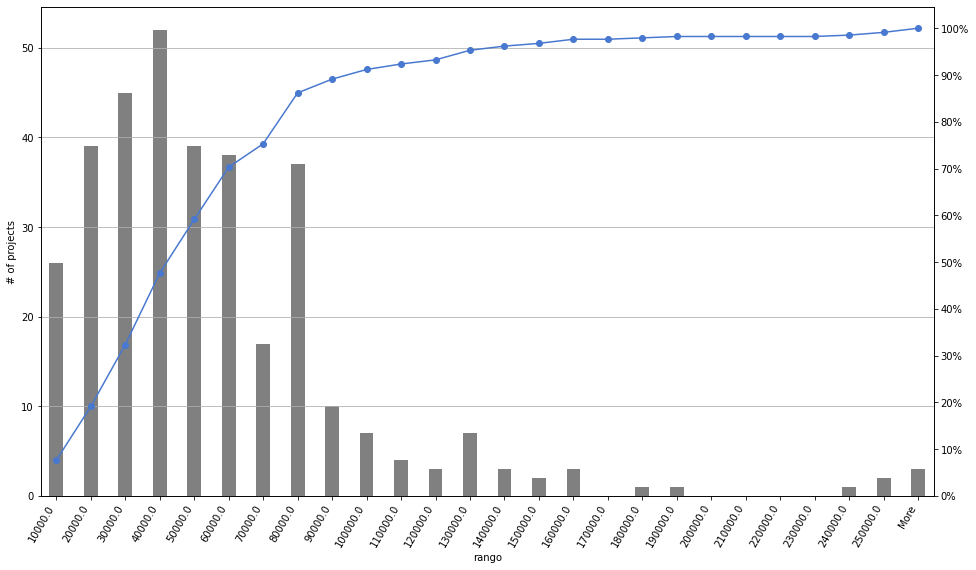

In [5]:
plt.figure()
ax1 = df2[['rango', 'count']].plot(x='rango', kind="bar", figsize=(16,9), legend=False, width=0.4, color="grey")
ax1.set_ylabel("# of projects")
ax2 = df2['pcts_sum'].plot(secondary_y=True, marker='o')
ax2.set_ylim(bottom=0)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10.00))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60, ha="right")
# plt.title("Number of research projects and total funding across the whole analysed period (1993-2019)",fontsize=20,fontweight="bold")
ax1.grid(axis="y")
#ax2.grid(axis="y")
plt.show()

#### Table

In [6]:
df2

,rango,count,pcts,pcts_sum
0,10000,26,7.647059,7.647059
1,20000,39,11.470588,19.117647
2,30000,45,13.235294,32.352941
3,40000,52,15.294118,47.647059
4,50000,39,11.470588,59.117647
5,60000,38,11.176471,70.294118
6,70000,17,5.000000,75.294118
7,80000,37,10.882353,86.176471
8,90000,10,2.941176,89.117647
9,100000,7,2.058824,91.176471
